# Neural Networks Overview

From previous lessom, we implemented a logistic regression. In that model, we saw that we compute $z$ with features $x$ and parameters $w$ and $b$. $z$ is then used to computes $a$, which is used to predict $\hat{y}$. Then you can compute the loss function $\mathcal{L}$. 

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Deeplearning.ai/Neural%20Networks%20and%20Deep%20Learning/Week%203/images/logistic_regression.svg" width="40%" align="center"/>

A neural network is similar to the logistic regression, but in addition it stacking together a lot of little sigmoid units. In the neural network, the stack of nodes performs the $z$ calculation, as well as, the $a$ calculation. Thus, a node corresponds to a $z$ score and another node to another $z$ score. As logistic regression, we have as inputs the features $x$ and some parameters $w$ and $b$. For each node that calculate the values of $z$ and $a$, we define an index or identifier (a superscript square bracket to refer to quantities associated with this stack of nodes, also called the layer). Thus, a value $W^{[1]}$ corresponds to the scores in nodes of the first layer, $W^{[2]}$ the scores of the second layer and so on. The image below illustrates the architecture of a neural network.

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Deeplearning.ai/Neural%20Networks%20and%20Deep%20Learning/Week%203/images/neural_network.svg" width="40%" align="center"/>

# Neural Network Representation

To introduce neural networks, we start by showing the neural network with a single hidden layer, as illustred in the image below. 

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Deeplearning.ai/Neural%20Networks%20and%20Deep%20Learning/Week%203/images/neural_network_explanation.svg" width="40%" align="center"/>

This network contains input features ($x_1, x_2, x_3$) stacked up vertically in the so called `input layer`. In our image, the input is an array $X$ containing three rows and one column. 

$$
X = \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}
$$

For input, we use the vector $X$ to denote the input features, but an alternative notation for the values of the input features will be $a^{[0]}$. And the term `a` stands for activations and it refers to the values that different layers of the neural network are passing on to the subsequent layers. Thus, the input layer passes on the values of $X$ to the hidden layer, and the activations of the input layer will be called $a^{[0]}$.

The next layer containing four nodes, is called the `hidden layer` of the neural network. It is called hidden layer because in the training set, the true values for these nodes in the middle are not observed. The input values and the output can be seen, but things in this layer are not seen in the training set. This layer will generate some set of activations, which will be called $a^{[1]}$. In particular, the first unit or the first node generates a value $a^{[1]}_1$, the second node generates a value $a^{[1]}_2$, and so on. This layer is a four dimension vector (4 column vector) since we have four nodes, or four units, or four hidden units in this hidden layer, as:

$$
a^{[1]} = \begin{bmatrix}
a^{[1]}_1 \\
a^{[1]}_2 \\
a^{[1]}_3 \\
a^{[1]}_4 \\
\end{bmatrix}
$$

Finally, the last layer is a single-node layer called `output layer`. It is responsible for generating the predicted value $\hat{y}$. In a neural network that you train with supervised learning, the training set contains values of the inputs $X$ as well as the target outputs $Y$. This value generates some value $a^{[2]}$, which is just a real number. Thus, $\hat{y}$ takes on the value of $a^{[2]}$. 

This kind of neural network illustred in the image is called *two-layer neural network* and is called as two-layer because we count all layers in neural networks but the input layer. Hence, the hidden layer is layer one and the output layer is layer two. In our notational convention, the input layer is the layer zero, so technically, there are three layers in this neural network since there is the input layer, the hidden layer, and the output layer. 

Finally, the hidden layer and the output layers will have parameters associated with them. Each layer will have associated with it parameters $w$ and $b$. We write $w^{[1]}$ to indicate that these are parameters associated with layer one (the hidden layer). The weights matrix is a 4 by 3 matrix and b is 4 by 1 vector in this example, as:

$$
w^{[1]} = \begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
w_{31} & w_{32} & w_{33} \\
w_{41} & w_{42} & w_{43} \\
\end{bmatrix} \ \ \ \ \ \ b^{[1]} = \begin{bmatrix}
b_1 \\
b_2 \\
b_3 \\
b_4 \\ 
\end{bmatrix}
$$

Where the first dimension (4) comes from the fact that we have four nodes or four hidden units, and the second dimension (3) comes from the fact that we have three input features. On the other hand, our matrix of parameters $w^{[2]}$ and $b^{[2]}$ contain a 1 by 4 and 1 by 1 matrices respectively. The 1 by 4 comes from the fact that the hidden layer has four hidden units and the output layer has just one unit.

# Computing a Neural Network's Output

Using the neural network presented above (2 layer neural network), we have to compute for each node the values of `z` and `a` (*e.g.*, $z^{[1]}_1$, $z^{[1]}_2$, $z^{[1]}_3$ and $z^{[1]}_4$). Considering the first node of layer one, we can compute the value of $z^{[1]}_1$ as:

$$
z^{[1]}_1 = w^{[1]T}_1 x + b^{[1]}_1 \\
a^{[1]}_1 = \sigma(z^{[1]}_1)
$$

Extending the computation for all nodes of the hidden layer, we have:

$$
z^{[1]}_1 = w^{[1]T}_1 x + b^{[1]}_1,\ \ \ \ a^{[1]}_1 = \sigma(z^{[1]}_1) \\
z^{[1]}_2 = w^{[1]T}_2 x + b^{[1]}_2,\ \ \ \ a^{[1]}_2 = \sigma(z^{[1]}_2) \\
z^{[1]}_3 = w^{[1]T}_3 x + b^{[1]}_3,\ \ \ \ a^{[1]}_3 = \sigma(z^{[1]}_3) \\
z^{[1]}_4 = w^{[1]T}_4 x + b^{[1]}_4,\ \ \ \ a^{[1]}_4 = \sigma(z^{[1]}_4) \\
$$

As computing them separately would be very inefficient, we can compute them using a vectorized version as:

$$
Z^{[1]} = W^{[1]T} X + b^{[1]} \\
\begin{bmatrix}
z^{[1]}_1 \\
z^{[1]}_2 \\
z^{[1]}_3 \\
z^{[1]}_4 \\
\end{bmatrix} = \begin{bmatrix}
- w^{[1]T}_1 - \\
- w^{[1]T}_2 - \\
- w^{[1]T}_3 - \\
- w^{[1]T}_4 - \\
\end{bmatrix} \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix} + \begin{bmatrix}
b^{[1]}_1 \\
b^{[1]}_2 \\
b^{[1]}_3 \\
b^{[1]}_4 \\
\end{bmatrix} = \begin{bmatrix}
w^{[1]T}_1 x + b^{[1]}_1 \\
w^{[1]T}_2 x + b^{[1]}_2 \\
w^{[1]T}_3 x + b^{[1]}_3 \\
w^{[1]T}_4 x + b^{[1]}_4 \\
\end{bmatrix}
$$

And then, we compute $a^{[1]}$ as:

$$
a^{[1]} = \sigma(z^{[1]}) \\
$$

$$
\begin{bmatrix}
a^{[1]}_1 \\
a^{[1]}_2 \\
a^{[1]}_3 \\
a^{[1]}_4 \\
\end{bmatrix} = \sigma \left ( \begin{bmatrix}
z^{[1]}_1 \\
z^{[1]}_2 \\
z^{[1]}_3 \\
z^{[1]}_4 \\
\end{bmatrix} \right )
$$

Expanding the computation for all layers of our network, we have the computation and the dimensions as:

$$
\begin{matrix}
z^{[1]} = W^{[1]}x + b^{[1]} & (4,1) = (4,3)(3,1) + (4,1) \\
a^{[1]} = \sigma(z^{[1]})    & (4,1) = (4,1) \\
z^{[2]} = W^{[2]}a^{[1]} + b^{[2]} & (1,1) = (1,4)(4,1) + (1,1) \\
a^{[2]} = \hat{y} = \sigma(z^{[2]})    & (1,1) = (1,1) \\
\end{matrix}
$$

An example in Python of this example is presented below.

In [6]:
import numpy as np

def sigmoid(z):
    return 1./(1. + np.exp(-1.*z))

# Input (3, 1) matrix
X = np.array([
    [0.1],
    [0.2],
    [0.3]
])

# Initialize matrices
W1 = np.random.randn(3,4)
W2 = np.random.randn(4,1)
b1 = np.ones((4, 1))
b2 = np.ones((1, 1))

# Compute scores
Z1 = np.dot(W1.T, X) + b1
a1 = sigmoid(Z1)
Z2 = np.dot(W2.T, a1) + b2
a2 = sigmoid(Z2)
yhat = a2
print('Prediction: {}'.format(yhat))

Prediction: [[0.32177144]]


# Vectorizing Across Multiple Examples

In the previous example, we can compute the prediction $\hat{y}$ for a single example. Here, we identify an example as a number superscript between parenthesis. Thus, $x^{(1)}$ is the first example, $x^{(2)}$ is the second example, and so on up to $x^{(m)}$ the $m$ example. Each example, generates a $a^{[2](i)}$, where $i$ is the example. Thus, we have:

$
x^{(1)} \ \ \ \ \rightarrow \ \ \ \ a^{[2](1)} = \hat{y}^{(1)} \\
x^{(2)} \ \ \ \ \rightarrow \ \ \ \ a^{[2](2)} = \hat{y}^{(2)} \\
x^{(3)} \ \ \ \ \rightarrow \ \ \ \ a^{[2](3)} = \hat{y}^{(3)} \\
\ldots \\
x^{(m)} \ \ \ \ \rightarrow \ \ \ \ a^{[2](m)} = \hat{y}^{(m)} \\
$


In a non-vectorized version, this would lead to the following algorithm:

```python
for i in range(m):
    z1[i] = np.dot(W1.T, x[i]) + b1
    a1[i] = sigmoid(z1[i])
    z2[i] = np.dot(W2.T, a1[i]) + b2
    a2[i] = sigmoid(z2[i])
    yhat[i] = a2[i]
```

In order to vectorize this implementation, we have to consider the matrix $X$ as:

$$
X = \begin{bmatrix}
   |    &    |    &        &    |    \\
x^{(1)} & x^{(2)} & \ldots & x^{(m)} \\
   |    &    |    &        &    |    \\ 
\end{bmatrix}
$$

Hence, we can calculate the other matrices as:

$$
Z^{[1]} = W^{[1]}X + b^{[1]} \\
A^{[1]} = \sigma(Z^{[1]}) \\
Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]} \\
A^{[2]} = \sigma(Z^{[2]}) \\
\hat{Y} = A^{[2]}
$$

If we calculate like that, we generate matrices as:

$$
Z^{[1]} = \begin{bmatrix}
   |    &    |    &        &    |    \\
z^{[1](1)} & z^{[1](2)} & \ldots & z^{[1](m)} \\
   |    &    |    &        &    |    \\ 
\end{bmatrix} \ \ \ \ \ \
A^{[1]} = \begin{bmatrix}
   |    &    |    &        &    |    \\
a^{[1](1)} & a^{[1](2)} & \ldots & a^{[1](m)} \\
   |    &    |    &        &    |    \\ 
\end{bmatrix} \\
\\
Z^{[2]} = \begin{bmatrix}
   |    &    |    &        &    |    \\
z^{[2](1)} & z^{[2](2)} & \ldots & z^{[2](m)} \\
   |    &    |    &        &    |    \\ 
\end{bmatrix} \ \ \ \ \ \
A^{[2]} = \begin{bmatrix}
   |    &    |    &        &    |    \\
a^{[2](1)} & a^{[2](2)} & \ldots & a^{[2](m)} \\
   |    &    |    &        &    |    \\ 
\end{bmatrix} \\
$$

In this configuration, we have the rows representing the activation for each example of the training set, and columns representing the activation for each neuron of the layer. Thus, the first element of the matrix $Z^{[1]}$ represents the activation of the first neuron in the first layer of the first example of the training set. In case of the element of the first row, second column, we have the activation of the first neuron in the first layer of the second example of the training set, and so on.

# Activation Functions

Using the previous examples, we can calculate the forward propagation of a neural network as:

$$
Z^{[1]} = W^{[1]T}X + b^{[1]} \\
A^{[1]} = \sigma(Z^{[1]}) \\
Z^{[2]} = W^{[2]T}A^{[1]} + b^{[2]} \\
A^{[2]} = \sigma(Z^{[2]}) \\
\hat{Y} = A^{[2]}
$$

Where `sigmoid` ($\sigma$) is the activation function. Sigmoid is calculated as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

This fuction generates values as the plot below.

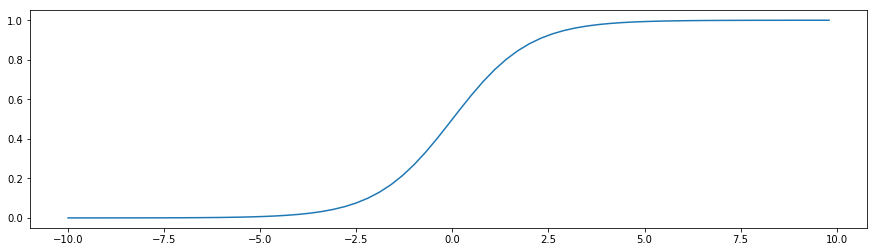

In [12]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(15,4))

def sigmoid(z):
    return 1./(1. + np.exp(-1.*z))

x = np.arange(-10, 10, 0.3)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

Instead of using sigmoid as activation function, we can replace it by a generic function in our calculations as:

$$
Z^{[1]} = W^{[1]T}X + b^{[1]} \\
A^{[1]} = g(Z^{[1]}) \\
Z^{[2]} = W^{[2]T}A^{[1]} + b^{[2]} \\
A^{[2]} = g(Z^{[2]}) \\
\hat{Y} = A^{[2]}
$$

Where `g` is our activation function and can be replace for any non-linear function. For example, we can use the `tanh(z)` function, which is expressed by the formula:

$$
tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
$$

This fuction generates values as the plot below.

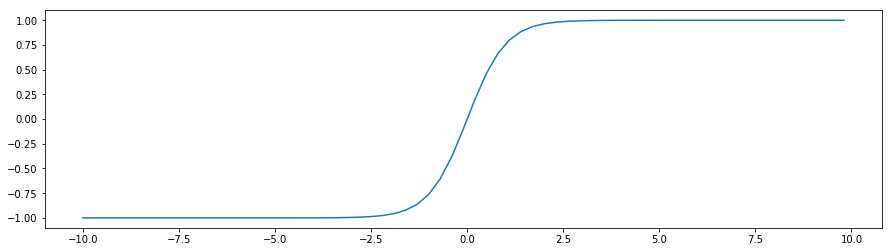

In [13]:
plt.figure(figsize=(15,4))

def tanh(z):
    # could also be used as np.tanh(z)
    return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))

x = np.arange(-10, 10, 0.3)
y = tanh(x)

plt.plot(x, y)
plt.show()

In fact, it turns out that the `tanh` function works better in hidden layers than the `sigmoid` function. The only exception is the output layer, since values in `tanh` range between -1 and 1, while in `sigmoid` function they range from 0 to 1, serving as a probability.

One of the downsides of both the `sigmoid` function and the `tanh` function is that if $z$ is either very large or very small, then the gradient, or the derivative, or the slope of this function becomes very small (being close to 0), which can slow down gradient descent. One option to solve this problem is called REctified Linear Unit (ReLU). This function converts values lower than zero to zero and keeps the values above zero as they are. Its equation is represented as:

$$
ReLU(z) = max(0, z)
$$

The output of this function is illustred in the plot below.

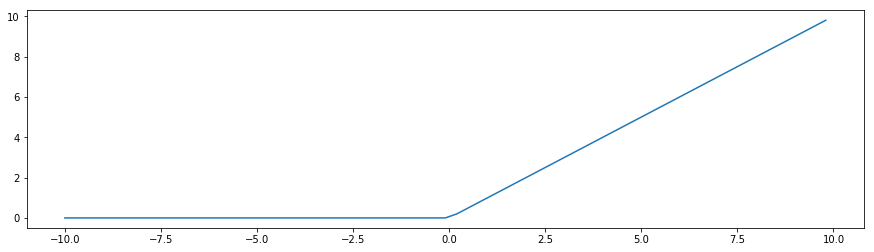

In [16]:
plt.figure(figsize=(15,4))

def relu(z):
    # could also be used as np.tanh(z)
    return np.maximum(0,z)

x = np.arange(-10, 10, 0.3)
y = relu(x)

plt.plot(x, y)
plt.show()

In this case, the derivative is 1 for a value of $z$ positive, and 0 when $z$ is negative. In the border (*i.e.*, when $z=0$, the derivative is equal to 0. 

**Rules of thumb**:
- If your output is 0 or 1 value (*i.e.*, a binary classification), then the `sigmoid` activation function is a very natural choice for the output layer. 
- For all other units use the `ReLU`.

An option to the `ReLU` function is the `Leaky ReLU` function, which adds a modification in the negative side of `ReLU`. Instead of clipping values at zero, it considers the value of $z$ to generate the output. It can be calculated as:

$$
\text{Leaky_ReLU}(z) = max(0.01*z, z)
$$

The output of `Leaky ReLU` is illustred below.

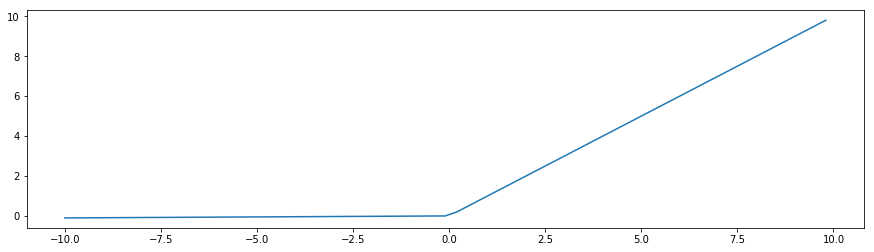

In [19]:
plt.figure(figsize=(15,4))

def leaky_relu(z):
    return np.maximum(0.01*z, z)

x = np.arange(-10, 10, 0.3)
y = leaky_relu(x)

plt.plot(x, y)
plt.show()

# Derivatives of Activation Functions

When implementing back propagation for your neural network, you need to compute the slope or the derivative of the activation functions. Here, we will analyse some of these derivatives.

### Derivative of Sigmoid Function

Consider the Sigmoid activation function, which is calculated by the equation:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

For each part of this function, we can calculate the slope or the derivative corresponding to. If `g(z)` is the sigmoid function, then the slope of the function is:

$$
\frac{d}{dz}g(z) \ \ \ \ \rightarrow \ \ \ \ \text{slope of g(z) at point z}
$$

Calculating the derivative of the sigmoid function, we have:

$$
\frac{d}{dz}g(z) = \frac{1}{1+e^{-z}} \left ( 1 - \frac{1}{1+e^{-z}} \right ) = g(z) (1 - g(z))
$$

We can implement this function in Python and perform a sanity check.

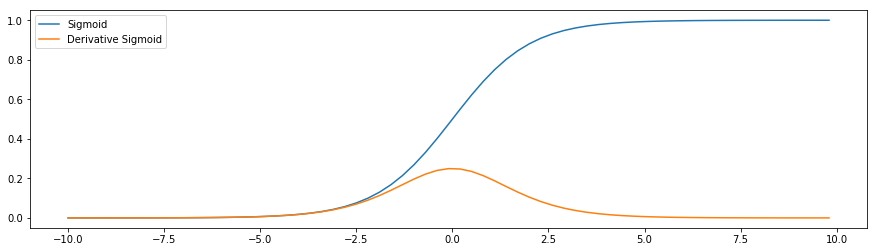

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(15,4))

def sigmoid(z):
    return 1./(1. + np.exp(-1.*z))

def derivative_sigmoid(z):
    return sigmoid(z)*(1 - sigmoid(z))

x = np.arange(-10, 10, 0.3)
ys = sigmoid(x)
yd = derivative_sigmoid(x)

plt.plot(x, ys, label='Sigmoid')
plt.plot(x, yd, label='Derivative Sigmoid')
plt.legend()
plt.show()

As we can see, when the value of $z$ is very small (*e.g.*, -10), the slope of the sigmoid is equal to zero. As we increase the value of $z$, the slope increases too up to $z=0$ when it achieves the highest slope. After $z=0$ the slope of the function starts to decrease again. When the value of $z$ is very high (*e.g.*, 10), the slope of the sigmoid is again equal to zero.

In neural networks is common to see that $\frac{d}{dz}g(z) = g'(z)$. As $g(z) = a$, *i.e.*, $g(z)$ is the activation of the function, it is common to see $g'(z)$ as:

$$
g'(z) = a(1-a)
$$

### Derivative of Tanh Function

Consider the Tanh activation function, which is calculated by the equation:

$$
g(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}
$$

For each part of this function, we can calculate the slope or the derivative corresponding to. If `g(z)` is the Tanh function, then the slope of the function is:

$$
\frac{d}{dz}g(z) \ \ \ \ \rightarrow \ \ \ \ \text{slope of g(z) at point z}
$$

Calculating the derivative of the Tanh function, we have:

$$
\frac{d}{dz}g(z) = 1 - \left ( \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}} \right )^2 = 1 - tanh(z)^2
$$

We can implement this function in Python and perform a sanity check.

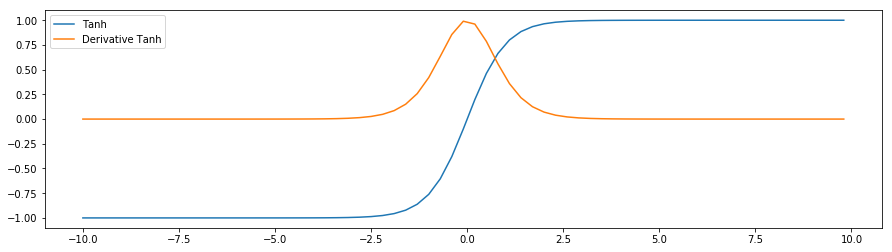

In [4]:
plt.figure(figsize=(15,4))

def tanh(z):
    return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))

def derivative_tanh(z):
    return 1 - tanh(z)**2

x = np.arange(-10, 10, 0.3)
yt = tanh(x)
yd = derivative_tanh(x)

plt.plot(x, yt, label='Tanh')
plt.plot(x, yd, label='Derivative Tanh')
plt.legend()
plt.show()

As in Sigmoid function, when the value of $z$ is small (*e.g.*, -10), the slope is equal to zero. The maximum slope is achieved when $z=0$ and with high values of $z$, the slope is equal to zero again. As in sigmoid, it is common to see the derivative of Tanh function written in terms of $a$ as:

$$
g'(z) = 1 - a^2
$$

### Derivative of ReLU Function

Consider the ReLU activation function, which is calculated by the equation:

$$
g(z) = max(0, z)
$$

For each part of this function, we can calculate the slope or the derivative corresponding to. If `g(z)` is the ReLU function, then the slope of the function is:

$$
\frac{d}{dz}g(z) \ \ \ \ \rightarrow \ \ \ \ \text{slope of g(z) at point z}
$$

Calculating the derivative of the ReLU function, we have:

$$
\frac{d}{dz}g(z) = \left\{\begin{matrix}
0 & \text{if}\ \ z<0\\ 
1 & \text{if}\ \ z\geqslant 0
\end{matrix}\right.
$$

We can implement this function in Python and perform a sanity check.

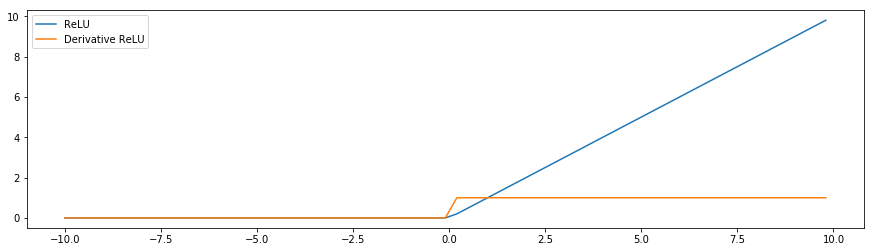

In [9]:
plt.figure(figsize=(15,4))

def relu(z):
    return np.maximum(0, z)

def derivative_relu(z):
    return np.where(z <= 0, 0, 1)

x = np.arange(-10, 10, 0.3)
yt = relu(x)
yd = derivative_relu(x)

plt.plot(x, yt, label='ReLU')
plt.plot(x, yd, label='Derivative ReLU')
plt.legend()
plt.show()

### Derivative of Leaky ReLU Function

Consider the Leaky ReLU activation function, which is calculated by the equation:

$$
g(z) = max(0.01z, z)
$$

For each part of this function, we can calculate the slope or the derivative corresponding to. If `g(z)` is the Leaky ReLU function, then the slope of the function is:

$$
\frac{d}{dz}g(z) \ \ \ \ \rightarrow \ \ \ \ \text{slope of g(z) at point z}
$$

Calculating the derivative of the Leaky ReLU function, we have:

$$
\frac{d}{dz}g(z) = \left\{\begin{matrix}
0.01 & \text{if}\ \ z<0\\ 
1 & \text{if}\ \ z\geqslant 0
\end{matrix}\right.
$$

We can implement this function in Python and perform a sanity check.

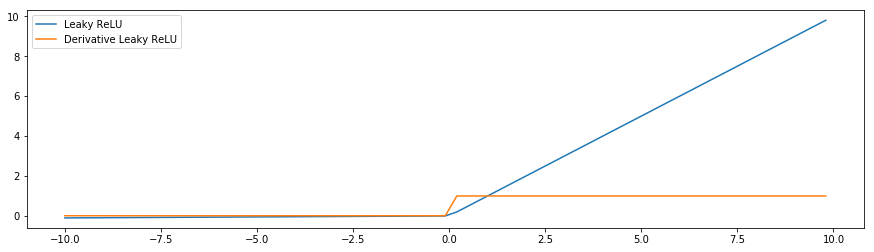

In [13]:
plt.figure(figsize=(15,4))

def leaky_relu(z):
    return np.maximum(0.01*z, z)

def derivative_leaky_relu(z):
    return np.where(z <= 0, 0.01, 1)

x = np.arange(-10, 10, 0.3)
yt = leaky_relu(x)
yd = derivative_leaky_relu(x)

plt.plot(x, yt, label='Leaky ReLU')
plt.plot(x, yd, label='Derivative Leaky ReLU')
plt.legend()
plt.show()

# Gradient descent for Neural Networks

Remember that for the example below, we have the following configuration:

- Parameters: $W^{[1]}$, $b^{[1]}$, $W^{[2]}$, $b^{[2]}$
- Cost function: $J(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}) = \frac{1}{m} \sum_{i=1}^n \mathcal{L}(\hat{y}, y)$

Hence, our gradient descent will compute:

$
\begin{matrix}
\text{Repeat \{} & & \\
    & \text{Compute predictions:} & (\hat{Y}^{(i)}, i=1, 2, 3, ... m) \\
    & \text{Compute derivatives:} & \left (dW^{[1]} = \frac{dJ}{dW^{[1]}},\ \ db^{[1]} = \frac{dJ}{db^{[1]}},\ \ dW^{[2]} = \frac{dJ}{dW^{[2]}},\ \ db^{[2]} = \frac{dJ}{db^{[2]}} \right ) \\
    & \text{Update weights:}      & W^{[1]} = W^{[1]} - \alpha dW^{[1]}, \\
    &                             & b^{[1]} = b^{[1]} - \alpha db^{[1]}, \\
    &                             & W^{[2]} = W^{[2]} - \alpha dW^{[2]}, \\
    &                             & b^{[2]} = b^{[2]} - \alpha db^{[2]} \\
\text{\}} & & \\
\end{matrix}
$

Recall that for computing forward and backpropagation, we have the following equations:

**Forward Propagation:**

$
Z^{[1]} = W^{[1]T}X + b^{[1]} \\
A^{[1]} = g^{[1]}(Z^{[1]}) \\
Z^{[2]} = W^{[2]T}A^{[1]} + b^{[2]} \\
A^{[2]} = g^{[2]}(Z^{[2]}) \\
$

**Backward Propagation:**

$
dZ^{[2]} = A^{[2]} - Y \\
dW^{[2]} = \frac{1}{m} dZ^{[2]}A^{[1]T} \\
db^{[2]} = \frac{1}{m} np.sum(dZ^{[2]}, \text{axis}=1, \text{keepdims=True}) \\
dZ^{[1]} = W^{[2]T}dZ^{[2]} * g^{[1]}(Z^{[1]}) \\
dW^{[1]} = \frac{1}{m} dZ^{[1]}X^T \\
db^{[1]} = \frac{1}{m} np.sum(dZ^{[1]}, \text{axis}=1, \text{keepdims=True}) \\
$

For understanding the backpropagation, let's consider the Logistic Regression below:

<img src="images/logistic_regression_graph.svg" width="70%" align="center" />

where the loss function is expressed as:

$$
\mathcal{L}(a, y) = -y \log a - (1 - y) \log (1 - a)
$$

For computing the backpropagation of this logistic regression, we first compute the derivative of the loss function $da$ as:

$$
da = \frac{d}{da}\mathcal{L}(a,y) = -\frac{y}{a} + \frac{1-y}{1-a}
$$

Having $da$, we compute $dz$ as:

$
dz = \frac{\partial \mathcal{L}}{\partial z} = \frac{\partial \mathcal{L}}{\partial a}.\frac{da}{dz} \\
\frac{d}{dz}g(z) = g'(z) \\
dz = da * g'(z) \ \ \ \ \rightarrow \ \ \ \ g(z) = \sigma(z) \\
dz = a - y \\
$

Finally, we compute $dw$ and $db$ as:

$$
dw = dz x \\
db = dz
$$

For computing backpropagation for our neural network of the example, we have to perform the same computation but this time, twice (one for the hidden layer and one for the output layer. Thus, consider our neural network with the graph represented in the image below:

<img src="images/neural_network_graph.svg" width="100%" align="center" />

Based on the backpropagation of the logistic regression, we can calculate the values of $dz^{[2]}$, $dW^{[2]}$ and $db^{[2]}$ as:

$
dz^{[2]} = a^{[2]} - y \\
dW^{[2]} = dz^{[2]}.a^{[1]T} \\
db^{[2]} = dz^{[2]}
$

Now, we can compute the values of $dZ^{[1]}$, $dW^{[1]}$, and $db^{[1]}$ as:

$
dz^{[1]} = W^{[2]T}dz^{[2]} * g^{[1]}{'}(z^{[1]})\\
dW^{[1]} = dz^{[1]}X^T \\
db^{[1]} = dz^{[1]} \\
$

where * is the element wise multiplication. These equations work for one example at time. When considering the vectorized version, where we stack examples to generate a matrix $Z$, we have the following equations:

$
dZ^{[2]} = A^{[2]} - Y \\
dW^{[2]} = \frac{1}{m} dZ^{[2]}A^{[1]T} \\
db^{[2]} = \frac{1}{m} np.sum(dZ^{[2]}, \text{axis}=1, \text{keepdims=True}) \\
dZ^{[1]} = W^{[2]T}dZ^{[2]} * g^{[1]}{'}(Z^{[1]}) \\
dW^{[1]} = \frac{1}{m} dZ^{[1]}X^T \\
db^{[1]} = \frac{1}{m} np.sum(dZ^{[1]}, \text{axis}=1, \text{keepdims=True}) \\
$

Below there is an example of the implementation of these equations in Python.

In [99]:
import numpy as np

# Activation functions
def relu(z, grad=True):
    a = np.maximum(0, z)
    if grad:
        da = np.where(z <= 0, 0, 1)
        return a, da
    return a

def sigmoid(z, grad=True):
    a = 1./(1. + np.exp(-1.*z))
    if grad:
        da = a*(1 - a)
        return a, da
    return a

def g(z, func='relu', grad=True):
    if func == 'relu':
        return relu(z, grad)
    else:
        return sigmoid(z, grad)

In [116]:
# Initialization of variables
# Dimensions:
# - Input: 3 features
# - Hidden layer: 4 neurons
# - Output layer: 1 neuron
dims = [3, 4, 1]

X = np.array([
    [0.1, 0.2, 0.1, 0.3, 0.09],
    [0.1, 0.2, 0.1, 0.3, 0.09],
    [0.1, 0.2, 0.1, 0.3, 0.09]
])
Y = np.array([1, 2, 1, 3, 4]).reshape(1,5)

# Parameters of the first layer 
# (4 neurons, 3 features)
W1 = np.random.randn(dims[1], dims[0])
dW1 = np.zeros(W1.shape)
b1 = np.ones((dims[1], 1))
db1 = np.zeros(b1.shape)

# Parameters of the second layer
W2 = np.random.randn(dims[2], dims[1])
dW2 = np.zeros(W2.shape)
b2 = np.ones((dims[2], 1))
db2 = np.zeros((b2.shape))

Our example has the following matrices, where values for weights are merely illustrative.

<img src="images/matrices_nn.svg" width="50%" align="center" />

In [117]:
#np.random.randn(3, 5) * 100
#hyperparameter
lr = 0.01
nb_epochs = 10

for i in range(1, nb_epochs+1):
    Z1 = np.dot(W1, X) + b1
    A1, dA1 = g(Z1, func='sigmoid')
    Z2 = np.dot(W2, A1) + b2
    A2, dA2 = g(Z2, func='sigmoid')

    dZ2 = A2 - Y
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * dA1
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims=True)

    J = 1./m * (- np.dot(Y, np.log(A2).T) + np.dot((1 - Y), np.log(1 - A2).T))
    print('Running epoch: {} - Loss: {} '.format(i, J[0][0]))

    W1 = W1 - lr*dW1
    b1 = b1 - lr*db1
    W2 = W2 - lr*dW2
    b2 = b2 - lr*db2

Running epoch: 1 - Loss: 2.23881204589 
Running epoch: 2 - Loss: 2.22876972025 
Running epoch: 3 - Loss: 2.2206500256 
Running epoch: 4 - Loss: 2.21439262966 
Running epoch: 5 - Loss: 2.20993769782 
Running epoch: 6 - Loss: 2.20722605747 
Running epoch: 7 - Loss: 2.20619934469 
Running epoch: 8 - Loss: 2.20680013376 
Running epoch: 9 - Loss: 2.20897205015 
Running epoch: 10 - Loss: 2.21265986777 


# Random Initialization

When initializing weight in a neural network is important to not start their values at zero. In case of doing this, all neurons will compute always the same values. Thus, a way to initialize weights in a neural network is to randomly assign low values to each neuron. It could be achieved using:

```python
W1 = np.random.randn((2,2)) * 0.01
b1 = np.zeros((2,1))
```

Unlike weights, bias can be initialized with zero values. Usually, weights are multiplied by a small value (*e.g.*, 0.01) reducing weights so that when calculating the values of $Z$, scores get close to the non-flat (derivation different than zero) part of the function. For example, consider the sigmoid function presented in the plot illustred previously. Now, imaginge that $z = W^TX+b$ obtain a high value due to the high values of $W$ (*e.g.*, 10). Observing the plot, we see that the derivative of $z=10$ is zero, *i.e*, the function is saturated. Thus, when updating weights, the derivative is not effective.  